# Model that are not sensitive to outliers
1. Naive Bayes classifier---Not Sensitive
2. SVM----------------------Not Sensitive
3. Linear regression--------Sensitive to outliers
4. Decision tree regressor or classifier----Not sensitive to outliers
5. Logistic Regression----Sensitive to outliers
6. Ensemble(RF,XGBOOST,GB)----Not sensitive to outliers
7. KNN------------------------Not Sensitive to outliers
8. Kmeans---------------------Sensitive
9. hierarchical---------------Sensitive
10. PCA------------------------Sensitive
12. Neural networks------------Sensitive to outliers

#All unsupervised techniques are basically impacted by outliers

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.chdir(r"C:\Users\Daniel\Documents\Feature Engineering\Titanic dataset")

In [6]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Age'].isnull().sum()

177

In [10]:
import seaborn as sns

C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

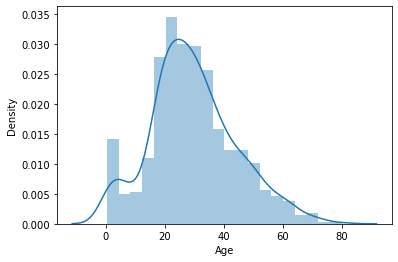

In [14]:
sns.distplot(df['Age'].dropna())

Creating an outlier by filling in the null values with a higher figure, 100 in this case

C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

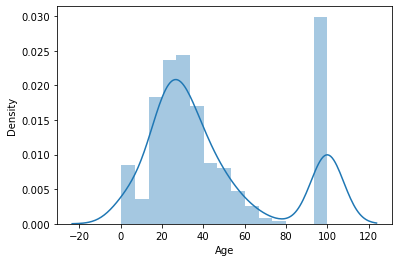

In [15]:
sns.distplot(df['Age'].fillna(100))

Gaussian Distribution

Text(0.5, 1.0, 'Number of passengers on Age')

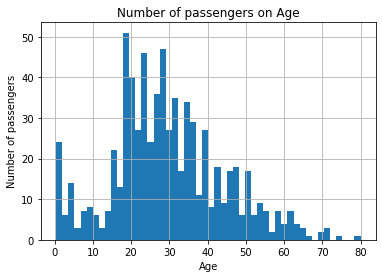

In [18]:
figure=df.Age.hist(bins=50)
figure.set_xlabel('Age')
figure.set_ylabel('Number of passengers')
figure.set_title('Number of passengers on Age')

The doted points in below boxplot suggests the presence of outliers

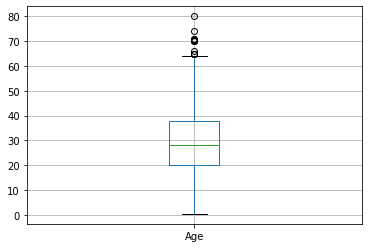

In [19]:
figure=df.boxplot(column="Age")

In [20]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Assuming Age follows a Gaussian Distribution we will calculate the bouinderies which differentiates the outliers

In [25]:
upper_boundary=df['Age'].mean()+(3* df['Age'].std())
lower_boundary=df['Age'].mean()-(3*df['Age'].std())
print(lower_boundary)
print(upper_boundary)
print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


####    let's calculate the interquantile range to compute the boundaries

In [27]:
IQR=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
IQR

17.875

In [29]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-6.6875
64.8125


In [30]:
# Extreme boundaries
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-33.5
91.625


#### For skewed Features

Text(0.5, 1.0, 'Number of passengers on Fare')

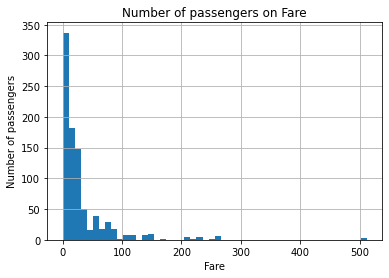

In [32]:
figure=df.Fare.hist(bins=50)
figure.set_xlabel('Fare')
figure.set_ylabel('Number of passengers')
figure.set_title('Number of passengers on Fare')

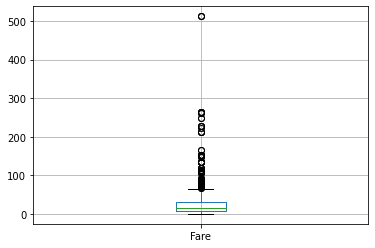

In [33]:
figure=df.boxplot(column="Fare")

In [34]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
upper_boundary=df['Fare'].mean()+(3* df['Fare'].std())
lower_boundary=df['Fare'].mean()-(3*df['Fare'].std())
print(lower_boundary)
print(upper_boundary)
print(df['Fare'].mean())

-116.87607782296811
181.2844937601173
32.2042079685746


In [35]:
IQR=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
IQR

23.0896

In [36]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [38]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [41]:
data=df.copy()

In [42]:
data.loc[data['Age']>73,'Age']=73

In [45]:
data.loc[data['Fare']>100,'Fare']=100

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Number of passengers on Fare')

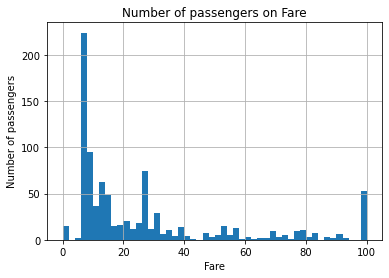

In [48]:
figure=data.Fare.hist(bins=50)
figure.set_xlabel('Fare')
figure.set_ylabel('Number of passengers')
figure.set_title('Number of passengers on Fare')